In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\franc\ENTORNO TRABAJO DATA y BI\IRONHACK\Projecto Oscars\csv\final_dataset.csv")

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\franc\AppData\Local\Temp\ipykernel_22204\2405641545.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\franc\AppData\Local\Temp\ipykernel_22204\2405641545.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


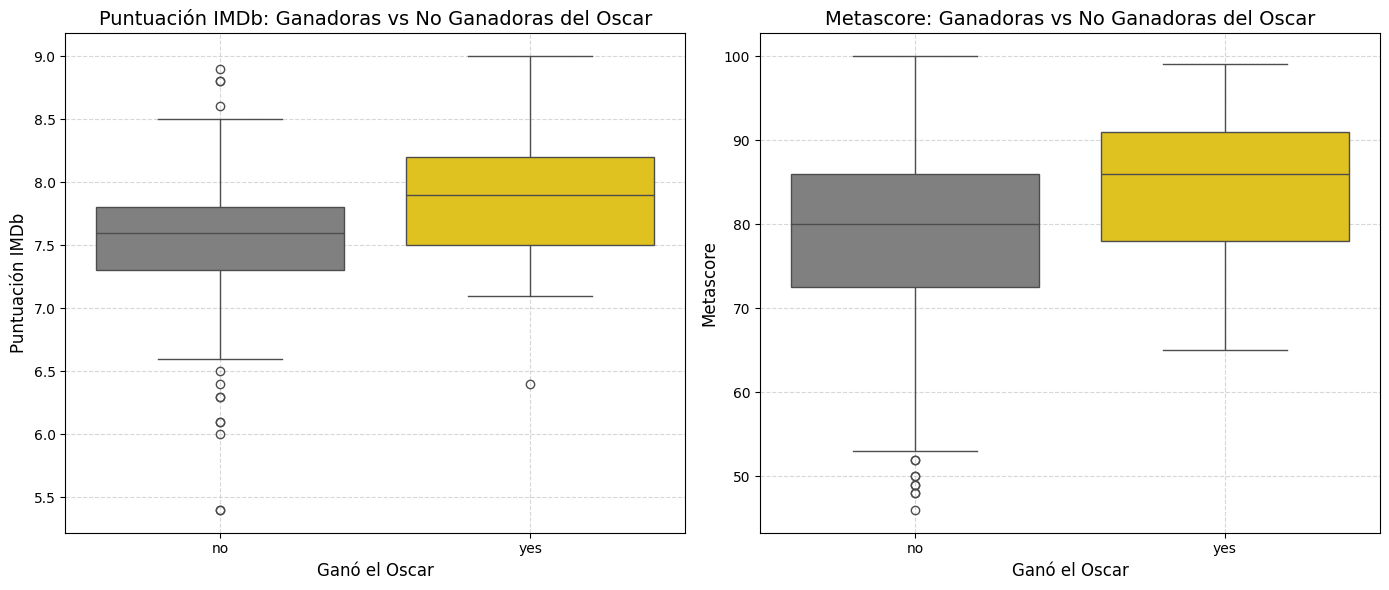

In [ ]:

plt.figure(figsize=(14, 6))

# Gráfico 1: IMDb Rating
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df,
    x='winner',
    y='imdbRating',
    palette={'yes': 'gold', 'no': 'gray'}
)
plt.title("Puntuación IMDb: Ganadoras vs No Ganadoras del Oscar", fontsize=14)
plt.xlabel("Ganó el Oscar", fontsize=12)
plt.ylabel("Puntuación IMDb", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Gráfico 2: Metascore
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df,
    x='winner',
    y='metascore',
    palette={'yes': 'gold', 'no': 'gray'}
)
plt.title("Metascore: Ganadoras vs No Ganadoras del Oscar", fontsize=14)
plt.xlabel("Ganó el Oscar", fontsize=12)
plt.ylabel("Metascore", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(r"C:\Users\franc\ENTORNO TRABAJO DATA y BI\IRONHACK\Projecto Oscars\visualizations\puntuiacionibdmganadorasyno.png")
plt.tight_layout()
plt.show()

In [13]:
# ░░ CONCLUSIONES: PUNTUACIONES IMDb Y METASCORE (GANADORAS vs NO GANADORAS) ░░

# 1. Las películas ganadoras del Oscar presentan en general una mayor puntuación media tanto en IMDb (público)
#    como en Metascore (crítica profesional), con medianas visiblemente más altas en ambos casos.

# 2. En IMDb (izquierda), aunque hay cierto solapamiento, las ganadoras suelen tener una media de entre 7.5 y 8.5,
#    mientras que las no ganadoras tienden a quedarse entre 6.5 y 7.5.

# 3. En Metascore (derecha), la diferencia es más clara: las ganadoras están más concentradas en la franja alta
#    (80-95), mientras que las no ganadoras tienen más dispersión y mayor presencia en valores bajos (<70).

# 4. La crítica parece valorar aún más que el público a las películas ganadoras, lo que sugiere que el premio
#    tiende a coincidir con estándares técnicos/artísticos reconocidos por los profesionales.

# 5. En conjunto, estos gráficos indican que ganar el Oscar suele estar asociado con un reconocimiento doble:
#    tanto de la crítica como de la audiencia.


#las películas premiadas no solo recaudan más (ver gráfico ROI), sino que también tienden a tener mejor calidad percibida desde ambas perspectivas.

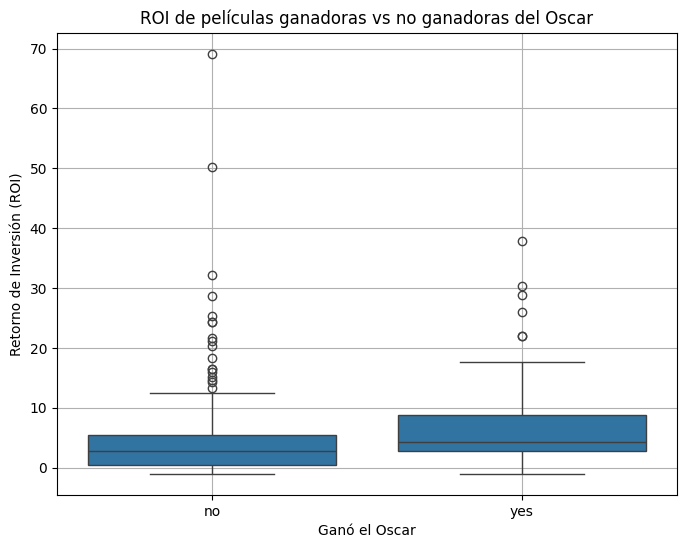

In [44]:
# Comparativa de ROI entre ganadoras y no ganadoras

# ¿Tienen mayor retorno de inversión las películas que ganaron el Oscar frente a las que no?

# Filtramos outliers extremos del ROI para una visualización más clara
# Aquí se eliminan las películas con ROI superior a 1000 (muy extremos)
df_filtrado = df[df["ROI"] < 1000]



# Creamos un diagrama de caja para comparar el ROI entre ganadoras y no ganadoras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(data=df_filtrado, x='winner', y='ROI')  # Comparación ROI por columna 'winner'
plt.title("ROI de películas ganadoras vs no ganadoras del Oscar")  # Título del gráfico
plt.xlabel("Ganó el Oscar")  # Etiqueta del eje X
plt.ylabel("Retorno de Inversión (ROI)")  # Etiqueta del eje Y
plt.grid(True)  # Muestra rejilla para mejor lectura
plt.savefig(r"C:\Users\franc\ENTORNO TRABAJO DATA y BI\IRONHACK\Projecto Oscars\visualizations\roiganadorasvsnoganadoras.png")
plt.show()  # Muestra el gráfico

In [15]:

#CONCLUSIÓN
#La mediana de ROI de las ganadoras (yes) es un poco más alta que la de las no ganadoras (no), pero no muchísimo.

#Hay más outliers con ROI muy alto entre las que no ganaron, lo cual es interesante.

#En ambos grupos hay películas que perdieron dinero (valores por debajo de 1 o incluso negativos).

#Las películas ganadoras del Oscar no garantizan un ROI más alto... pero en media o mediana, sí tienden a ir un poco mejor.

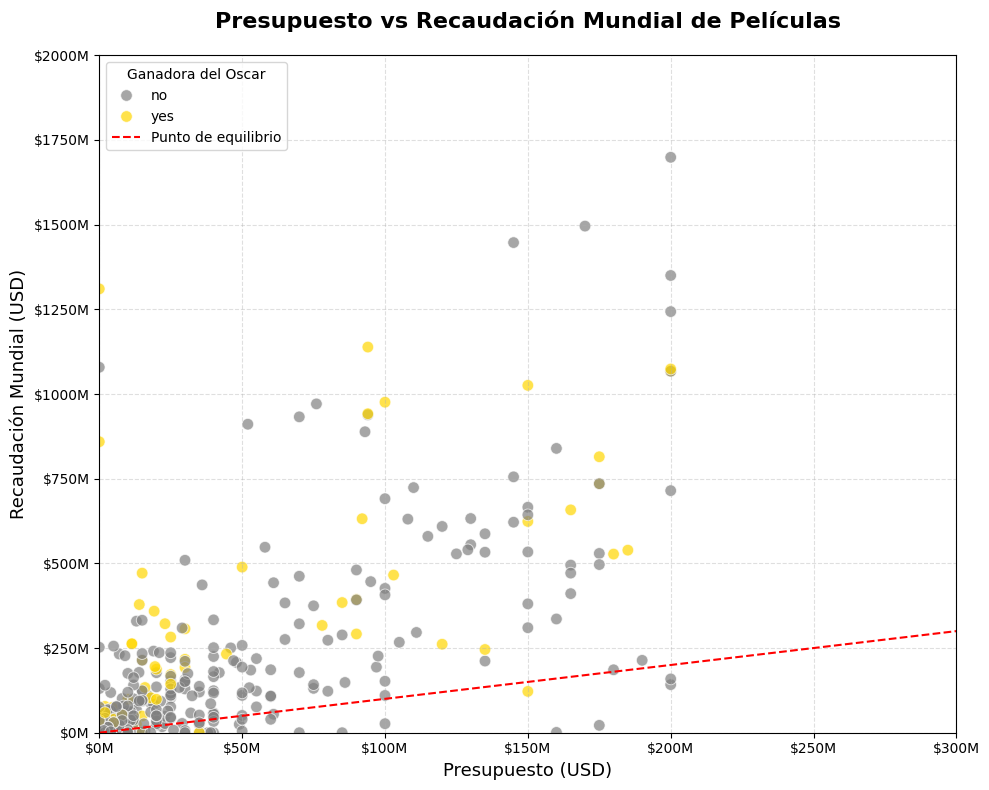

In [46]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos para que el presupuesto no supere los 500 millones
df_filtrado = df[df['budget'] <= 500_000_000]

# Creamos la figura
plt.figure(figsize=(10, 8))

# Scatter plot con presupuesto vs recaudación global
sns.scatterplot(
    data=df_filtrado,
    x='budget',
    y='Worlwide boxoffice',
    hue='winner',
    palette={'yes': 'gold', 'no': 'gray'},
    alpha=0.7,
    s=70
)

# Línea diagonal: punto de equilibrio (presupuesto = recaudación)
plt.plot([0, 300_000_000], [0, 300_000_000], color='red', linestyle='--', linewidth=1.5, label='Punto de equilibrio')

# Títulos y etiquetas
plt.title('Presupuesto vs Recaudación Mundial de Películas', fontsize=16, weight='bold', pad=20)
plt.xlabel('Presupuesto (USD)', fontsize=13)
plt.ylabel('Recaudación Mundial (USD)', fontsize=13)

# Rejilla y formato de ejes
plt.grid(True, linestyle='--', alpha=0.4)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'${y/1e6:.0f}M'))

# Límites del gráfico
plt.xlim(0, 300_000_000)
plt.ylim(0, 2_000_000_000)

# Leyenda
plt.legend(title='Ganadora del Oscar', loc='upper left', frameon=True)

# Ajustar el layout
plt.tight_layout()
plt.savefig(r"C:\Users\franc\ENTORNO TRABAJO DATA y BI\IRONHACK\Projecto Oscars\visualizations\presupuestoVsRecaudacion.png")
plt.show()



In [ ]:
#  CONCLUSIONES: PRESUPUESTO VS RECAUDACIÓN MUNDIAL 

# 1. La mayoría de las películas están situadas **por encima de la línea roja diagonal** (punto de equilibrio),
#    lo que indica que **recaudan más de lo que cuestan**. Es decir, la mayoría obtienen beneficios.

# 2. Las películas ganadoras del Oscar (en amarillo) **no dominan necesariamente las mayores recaudaciones**.
#    Aunque muchas están por encima de la línea (beneficio), no son mayoría en la zona de éxitos económicos extremos.

# 3. Se observa una **alta concentración en el rango bajo de presupuestos y recaudaciones**, pero con excepciones
#    notables (algunas películas logran ingresos de más de 3.000 millones USD).

# 4. Hay una dispersión considerable: algunas películas tienen presupuestos modestos y logran un ROI sobresaliente;
#    otras con presupuestos altos no alcanzan el punto de equilibrio, lo cual **demuestra que una gran inversión
#    no garantiza el éxito comercial**.

# 5. La línea roja ayuda visualmente a identificar **qué películas pierden dinero (bajo la línea)** y **cuáles son rentables (sobre ella)**.

# ░░ 
#    Este gráfico es clave para demostrar que el prestigio de los Oscars no siempre coincide con el rendimiento económico,
#    y que el éxito comercial puede darse fuera del circuito de premios.


C:\Users\franc\AppData\Local\Temp\ipykernel_22204\2114915955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ratings, x='winner', y='imdbRating', palette='pastel')


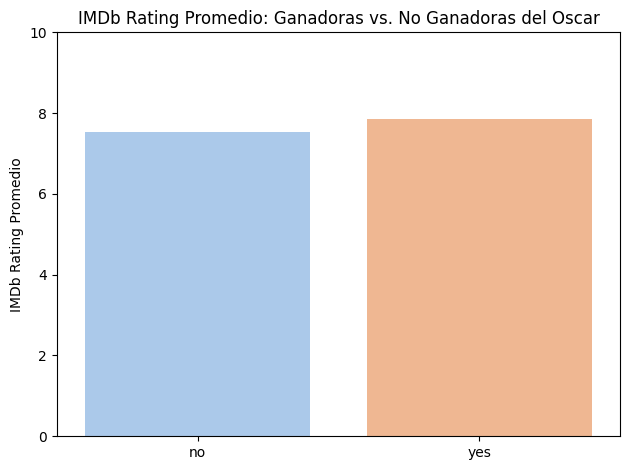

In [8]:

# Agrupar por ganadoras y no ganadoras
avg_ratings = df.groupby('winner')['imdbRating'].mean().reset_index()

# Visualización
sns.barplot(data=avg_ratings, x='winner', y='imdbRating', palette='pastel')
plt.title("IMDb Rating Promedio: Ganadoras vs. No Ganadoras del Oscar")
plt.ylabel("IMDb Rating Promedio")
plt.xlabel("")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

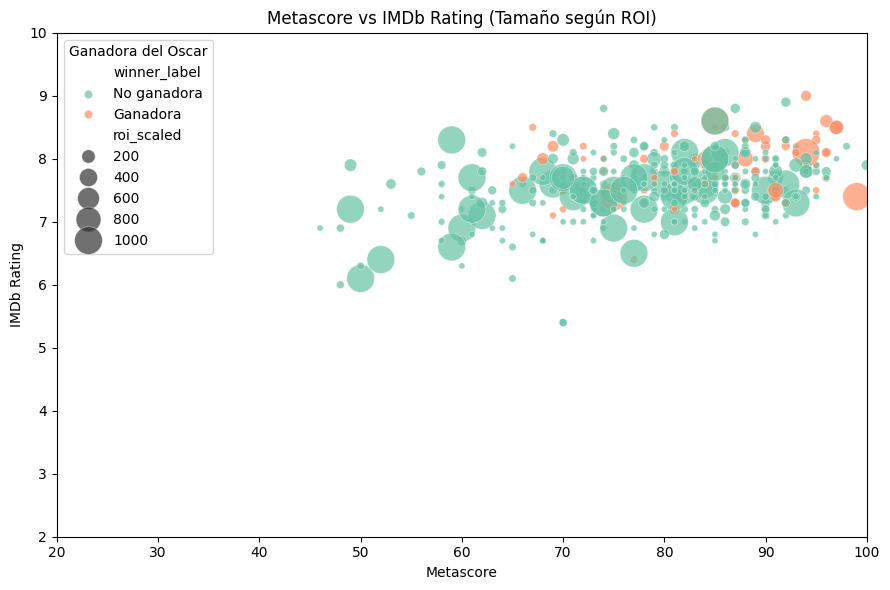

In [36]:
# Convertir 'winner' a algo más visual
df['winner_label'] = df['winner'].map({'yes': 'Ganadora', 'no': 'No ganadora'})

# Convertir ROI a tamaño de punto (puedes ajustar escala si hay valores muy grandes)
df['roi_scaled'] = df['ROI'].apply(lambda x: max(10, min(x * 10, 1000)))  # Escalado de tamaño

# Crear el gráfico
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df,
    x='metascore',
    y='imdbRating',
    size='roi_scaled',
    hue='winner_label',
    alpha=0.7,
    sizes=(20, 400),  # Tamaño mínimo y máximo del punto
    palette='Set2'
)

plt.title('Metascore vs IMDb Rating (Tamaño según ROI)')
plt.xlabel('Metascore')
plt.ylabel('IMDb Rating')
plt.xlim(20, 100)
plt.ylim(2, 10)
plt.legend(title='Ganadora del Oscar')
plt.tight_layout()
plt.savefig(r"C:\Users\franc\ENTORNO TRABAJO DATA y BI\IRONHACK\Projecto Oscars\visualizations\metascorevsimdbyroi.png")
plt.show()

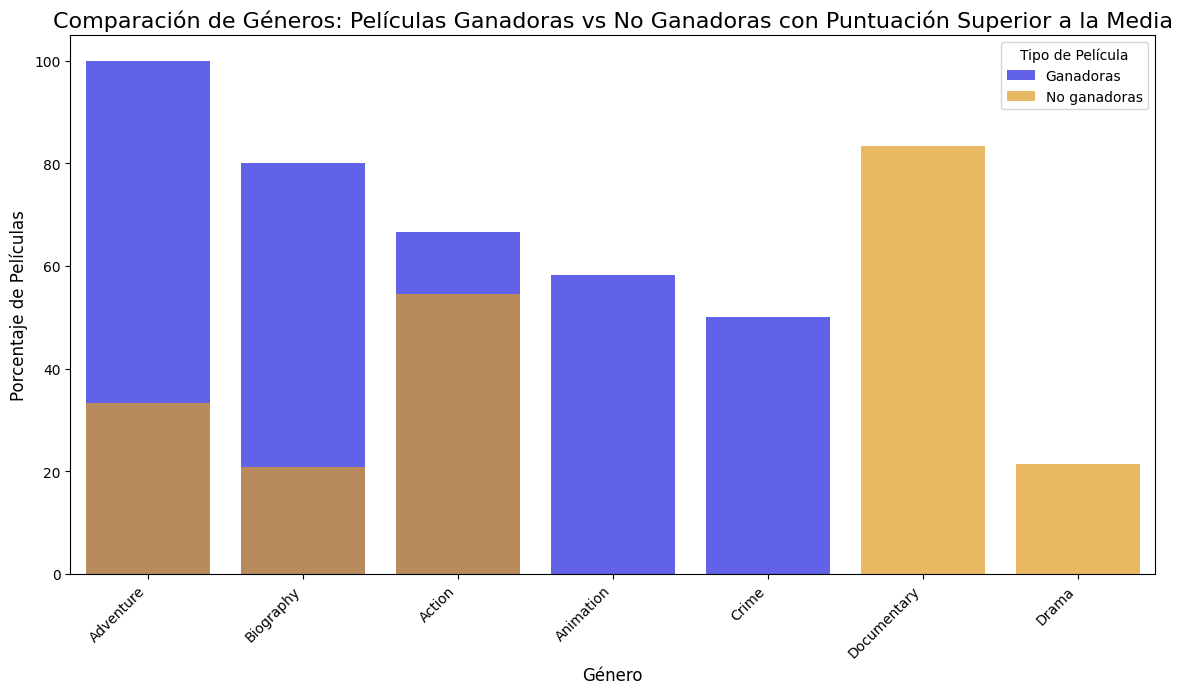

In [ ]:
# Paso 1: Filtrar las películas ganadoras y no ganadoras
df_winner = df[df['winner'] == 'yes']
df_no_winner = df[df['winner'] == 'no']

# Paso 2: Calcular la media de imdbRating para las películas ganadoras
imdb_avg_winner = df_winner['imdbRating'].mean()

# Paso 3: Filtrar las películas ganadoras con imdbRating superior a la media
df_high_rated_winner = df_winner[df_winner['imdbRating'] > imdb_avg_winner]

# Paso 4: Filtrar las películas no ganadoras con imdbRating superior a la media
df_high_rated_no_winner = df_no_winner[df_no_winner['imdbRating'] > imdb_avg_winner]

# Paso 5: Agrupar por género y contar las películas ganadoras y no ganadoras
peliculas_winner_por_genero = df_winner.groupby('genre').size().reset_index(name='total_count_winner')
peliculas_no_winner_por_genero = df_no_winner.groupby('genre').size().reset_index(name='total_count_no_winner')

# Paso 6: Contar cuántas películas ganadoras y no ganadoras tienen una puntuación superior a la media
peliculas_high_rated_winner = df_high_rated_winner.groupby('genre').size().reset_index(name='high_rated_count_winner')
peliculas_high_rated_no_winner = df_high_rated_no_winner.groupby('genre').size().reset_index(name='high_rated_count_no_winner')

# Paso 7: Unir los DataFrames de ganadoras y no ganadoras
peliculas_por_genero_winner = pd.merge(peliculas_winner_por_genero, peliculas_high_rated_winner, on='genre', how='left')
peliculas_por_genero_no_winner = pd.merge(peliculas_no_winner_por_genero, peliculas_high_rated_no_winner, on='genre', how='left')

# Paso 8: Calcular los porcentajes para las ganadoras y no ganadoras
peliculas_por_genero_winner['percentage_winner'] = (peliculas_por_genero_winner['high_rated_count_winner'] / peliculas_por_genero_winner['total_count_winner']) * 100
peliculas_por_genero_no_winner['percentage_no_winner'] = (peliculas_por_genero_no_winner['high_rated_count_no_winner'] / peliculas_por_genero_no_winner['total_count_no_winner']) * 100

# Paso 9: Unir los DataFrames para ganadoras y no ganadoras
peliculas_por_genero_comparacion = pd.merge(peliculas_por_genero_winner[['genre', 'percentage_winner']], 
                                             peliculas_por_genero_no_winner[['genre', 'percentage_no_winner']], 
                                             on='genre', 
                                             how='outer')

# Paso 10: Graficar los resultados en un gráfico de barras lado a lado
plt.figure(figsize=(14, 7))
sns.barplot(data=peliculas_por_genero_comparacion.sort_values(by='percentage_winner', ascending=False).head(5), 
            x='genre', y='percentage_winner', color='blue', label='Ganadoras', alpha=0.7)

sns.barplot(data=peliculas_por_genero_comparacion.sort_values(by='percentage_no_winner', ascending=False).head(5), 
            x='genre', y='percentage_no_winner', color='orange', label='No ganadoras', alpha=0.7)

# Añadir título y etiquetas
plt.title('Comparación de Géneros: Películas Ganadoras vs No Ganadoras con Puntuación Superior a la Media', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Porcentaje de Películas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Película', loc='upper right')
plt.savefig(r"C:\Users\franc\ENTORNO TRABAJO DATA y BI\IRONHACK\Projecto Oscars\visualizations\comparacion ganadoras media sup.png")
plt.show()

